## Исследование данных о российском кинопрокате



### Шаг 0. Подключение библиотек. 

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [3]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
mkrf_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [6]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


puNumber — номер прокатного удостоверения.
В mkrf_movies puNumber типа object, а в mkrf_shows puNumber типа int64. Необходимо привести puNumber к одному типу int64.

In [7]:
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors='coerce')
mkrf_movies[mkrf_movies['puNumber'].isna()]

# так как особо никаких данных по этому фильму нет, можем его удалить
mkrf_movies = mkrf_movies[mkrf_movies['puNumber'].isna() != True]
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [8]:
# объедините их в один датафрейм данные
movies = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [9]:
#Проверим ничего ли не потеряли - сравним суммы по box_office/budget до мержа и после
print('Сумма по budget до объединения и после равны:', mkrf_movies['budget'].sum() == movies['budget'].sum())

print('Сумма по box_office до объединения и после равны:', mkrf_shows['box_office'].sum() == movies['box_office'].sum())

Сумма по budget до объединения и после равны: True
Сумма по box_office до объединения и после равны: True


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

- show_start_date object должен быть datetime
- ratings object должен быть float

In [11]:
#поменяем тип show_start_date на datetime
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'], format='%Y-%m-%d')
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [12]:
movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Есть значения, которые указаны в процентах и есть в балах. Переведем к единому стилю.

In [13]:
#уберем знак %, заменим nan на 0 и изменим тип с object на float
movies['ratings'] = movies['ratings'].replace(to_replace ='%', value = '', regex = True).fillna(0).astype('float')

#переведем то что было в процентах в баллы
movies['ratings'] = movies['ratings'].apply(lambda x: x/10 if x> 10 else x)

movies['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Все данные правильного типа**

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [15]:
movies.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                     0
genres                    975
box_office               4327
dtype: int64

In [16]:
#посмотрим на пропуски в production_country
movies[movies['production_country'].isna()]

#так как Ерфлаш и Мульт личности российского производства, пропуски в production_country можно заменить на 'Россия' 
movies['production_country'] = movies['production_country'].fillna('Россия')
movies.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          0
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                     0
genres                    975
box_office               4327
dtype: int64

**Заполним пропуски в film_studio, director, producer и genres на unknown**

In [17]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['film_studio', 'director', 'producer', 'genres', 'financing_source'] 

for column in columns_to_replace:
    movies[column] = movies[column].fillna('unknown')

movies.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source            0
ratings                     0
genres                      0
box_office               4327
dtype: int64

**Заполним пропуски в refundable_support, nonrefundable_support, budget, на 0, а в financing_source на unknow потому что пропуски говорят о том, что у этих фильмов не было государственной поддержки и в box_office на 0, так как нет данных о сборы в рублях (подумаем что с этим делать дальше)**

In [18]:
# перебор названий столбцов в цикле и замена пропущенных значений на 0
columns_to_replace = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office'] 

for column in columns_to_replace:
    movies[column] = movies[column].fillna(0)

movies.isna().sum()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

**Пропусков нет**

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

- Проверим дубликаты в puNumber

In [19]:
movies[movies['puNumber'].duplicated() == True]
movies[movies['puNumber'] == 221154310]
movies[movies['puNumber'] == 221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,7.4,"комедия,криминал",0.0
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,6.8,"комедия,криминал",0.0


Проверив в интеренете эти фильмы, увидела что они не бьются по дате премьеры. Мне кажестя если удалить их, ничего страшного не произойдет

In [20]:
movies = movies.drop_duplicates('puNumber').reset_index(drop=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483 entries, 0 to 7482
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7483 non-null   object             
 1   puNumber               7483 non-null   int64              
 2   show_start_date        7483 non-null   datetime64[ns, UTC]
 3   type                   7483 non-null   object             
 4   film_studio            7483 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7483 non-null   object             
 7   producer               7483 non-null   object             
 8   age_restriction        7483 non-null   object             
 9   refundable_support     7483 non-null   float64            
 10  nonrefundable_support  7483 non-null   float64            
 11  budget                 7483 non-null   float64          

- Проверим дубликаты в title

In [21]:
movies['title'].value_counts() 

#уберем в title '_'
movies['title'] = movies['title'].replace(to_replace ='_', value = '', regex = True)

#уберем дубликаты в title оставив строки с максимальным значением в box_office
movies = movies.sort_values('box_office', ascending=False).drop_duplicates('title').sort_index().reset_index(drop=True)

#проверим 
movies[movies['title'] == 'Гадкий Я']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3761,Гадкий Я,124000710,2010-06-23 12:00:00+00:00,Анимационный,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз",США,"Пьер Коффин, Крис Рено","Джон Коэн, Кристофер Милидандри",«0+» - для любой зрительской аудитории,0.0,0.0,0.0,unknown,7.7,"мультфильм,фэнтези,комедия",6970.0


In [22]:
movies['genres'].unique()
#заменим в genres ',' на ', ' для наглядности
movies['genres'] = movies['genres'].replace(to_replace =',', value = ', ', regex = True)
movies['genres'].unique()

array(['боевик, драма, мелодрама', 'драма, военный',
       'фантастика, боевик, триллер', 'драма', 'мелодрама, комедия',
       'мюзикл, мелодрама, комедия', 'комедия, криминал',
       'боевик, триллер, детектив', 'боевик, драма, приключения',
       'драма, спорт', 'триллер, драма, мелодрама', 'комедия, мелодрама',
       'драма, мелодрама, комедия', 'драма, мелодрама', 'драма, история',
       'драма, мелодрама, семейный', 'комедия, мелодрама, криминал',
       'комедия', 'боевик, драма, криминал', 'драма, комедия',
       'ужасы, фантастика, комедия',
       'мультфильм, короткометражка, мелодрама', 'драма, криминал',
       'мультфильм, фантастика, фэнтези', 'драма, мелодрама, биография',
       'драма, комедия, военный', 'фантастика, драма, детектив',
       'мюзикл, семейный', 'unknown', 'военный, приключения, драма',
       'документальный, драма', 'драма, биография, история',
       'боевик, триллер, драма', 'фэнтези, боевик',
       'боевик, комедия, криминал', 'мюзикл, коме

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах

In [23]:
# изучим столбец 'production_country'
len(movies['production_country'].unique())
movies['production_country'].sort_values().unique()

#есть значение production_country 2019 заменим его на unknown
movies['production_country'] = movies['production_country'].str.replace('2019', 'unknown')

#убираем лишние пробелы в начале и конце
movies['production_country'] = movies['production_country'].str.strip()

#убираем ; в середине слова
movies['production_country'] = movies['production_country'].str.replace(';', '')

#приведем к одному стилю убрав лишние символы
movies['production_country'] = movies['production_country'].str.replace('-', ',').str.replace(' ,', ',').str.replace(',', ', ').str.replace('\s{2,}', ' ',regex=True)

len(movies['production_country'].unique())

806

In [24]:
pd.Series('слово    слово').str.replace('\s{2,}', ' ',regex=True).unique()

array(['слово слово'], dtype=object)

In [25]:
# изучим столбец 'genres'
len(movies['genres'].unique())
movies['genres'].sort_values().unique()

#таких проблем как были в production_country 

array(['unknown', 'аниме, мультфильм', 'аниме, мультфильм, боевик',
       'аниме, мультфильм, детектив', 'аниме, мультфильм, драма',
       'аниме, мультфильм, комедия', 'аниме, мультфильм, короткометражка',
       'аниме, мультфильм, мелодрама', 'аниме, мультфильм, приключения',
       'аниме, мультфильм, ужасы', 'аниме, мультфильм, фантастика',
       'аниме, мультфильм, фэнтези', 'биография',
       'биография, военный, драма', 'биография, документальный',
       'биография, драма', 'биография, драма, военный',
       'биография, драма, история', 'биография, драма, криминал',
       'биография, история', 'биография, история, драма',
       'биография, криминал, драма', 'биография, криминал, триллер',
       'биография, мелодрама, драма', 'биография, музыка, драма',
       'биография, музыка, мюзикл', 'биография, спорт, драма',
       'биография, спорт, история', 'биография, спорт, комедия', 'боевик',
       'боевик, вестерн, приключения', 'боевик, военный',
       'боевик, военный,

- Исправим проблемные значения в поле `type`

In [26]:
#изучим 'type'
movies['type'].unique()

#есть несколько значений, у которых появился пробел в начале строки, уберем его
movies['type'] = movies['type'].str.strip()
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [27]:
#проверим есть ли строки, в которых полный объём государственной поддержки меньше, чем 
#сумма объёма возвратных средств государственной поддержки и объёма невозвратных средств государственной поддержки
len(movies[(movies[['refundable_support', 'nonrefundable_support']].sum(axis=1) > movies['budget'])])

#получили 17 штук, посмотрим на них, так как это очень странно
movies[(movies[['refundable_support', 'nonrefundable_support']].sum(axis=1) > movies['budget'])]

#я думаю, если удалить 17 строк, ничего страшного не будет
incorrect_budget_index = movies[(movies['refundable_support'] + movies['nonrefundable_support']) > (movies['budget'])].index
movies.drop(incorrect_budget_index, inplace=True)

#проверим
len(movies[(movies[['refundable_support', 'nonrefundable_support']].sum(axis=1) > movies['budget'])])

0

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [28]:
movies['year'] = movies['show_start_date'].dt.year
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6739 entries, 0 to 6755
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6739 non-null   object             
 1   puNumber               6739 non-null   int64              
 2   show_start_date        6739 non-null   datetime64[ns, UTC]
 3   type                   6739 non-null   object             
 4   film_studio            6739 non-null   object             
 5   production_country     6739 non-null   object             
 6   director               6739 non-null   object             
 7   producer               6739 non-null   object             
 8   age_restriction        6739 non-null   object             
 9   refundable_support     6739 non-null   float64            
 10  nonrefundable_support  6739 non-null   float64            
 11  budget                 6739 non-null   float64          

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [29]:
#Создадим функцию для получения первого значения из списка в ячейке столбца
def get_first_value(column):
    ''' Получить первое значение из списка в ячейке столбца
    '''
    first_value_list = []
    for i in column:
        i_new = i.split(', ')
        first_value = i_new[0]
        first_value_list.append(first_value)
    first_value = pd.Series(first_value_list)
    return first_value

In [30]:
#Создадим 2 столбца chief_director и main_genres
movies['chief_director'] = movies['director'].str.split(', ').str[0]
movies['main_genres'] = movies['genres'].str.split(', ').str[0]

movies.head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,chief_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,7.2,"боевик, драма, мелодрама",0.0,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.0,0.0,0.0,unknown,6.6,"драма, военный",0.0,2016,Е.Матвеев,драма
2,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,"фантастика, боевик, триллер",0.0,2015,Тимур Бекмамбетов,фантастика
3,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,«6+» - для детей старше 6 лет,0.0,0.0,0.0,unknown,7.7,драма,0.0,2016,В.Абдрашитов,драма
4,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,8.3,"мелодрама, комедия",2700.0,2013,В.Меньшов,мелодрама
5,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.6,"мюзикл, мелодрама, комедия",0.0,2014,Джон Туртурро,мюзикл
6,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,0.0,0.0,0.0,unknown,8.0,"комедия, криминал",0.0,2016,Эрик Беснард,комедия
7,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,unknown,«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,7.8,"мелодрама, комедия",0.0,2014,В.Титов,мелодрама
8,Превосходство Борна /По одноименной новелле Ро...,221031416,2016-06-29 12:00:00+00:00,Художественный,"Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гип...",США,Пол Грингросс,"Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,7.7,"боевик, триллер, детектив",0.0,2016,Пол Грингросс,боевик
9,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,unknown,«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,7.8,"боевик, драма, приключения",0.0,2014,М.Туманишвили,боевик


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [31]:
#разделим сумму 'refundable_support' и 'nonrefundable_support' на 'budget'
movies['gos/budget'] =  movies.apply(lambda x: 0 if x['budget'] == 0 else round((x['refundable_support'] + x['nonrefundable_support']) / x['budget'], 2), axis=1)

movies.head()
movies[movies['budget'] > 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,chief_director,main_genres,gos/budget
1093,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма, мелодрама",3.653536e+05,2013,А.Атанесян,драма,0.33
1243,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,0.0,unknown,2.814000e+04,2014,А.Якимчук,unknown,0.70
1287,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия, фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,0.61
1310,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1554,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история, биография, драма",7.177032e+08,2019,А.Кравчук,история,0.51
6736,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм, приключения, семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,0.53
6744,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика, боевик",0.000000e+00,2019,Ф.Бондарчук,фантастика,0.53
6746,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,0.000000e+00,2019,И.Северов,драма,0.65


In [53]:
pd.Series([0]) / pd.Series([0])

0   NaN
dtype: float64

In [32]:
((movies['refundable_support'] + movies['nonrefundable_support']) / movies['budget']).mean()

0.5173858197698937

### Шаг 3. Проведите исследовательский анализ данных


**- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.**

In [33]:
#сколько фильмов выходило в прокат каждый год
display('Cколько фильмов выходило в прокат каждый год', movies.groupby('year')['year'].agg('count').sort_values())

#сколько фильмов, у которых данные о прокате в кинотеатрах известны, выходило в прокат каждый год
display('Cколько фильмов, у которых данные о прокате в кинотеатрах известны, выходило в прокат каждый год', movies[movies['box_office'] > 0].groupby('year')['year'].agg('count').sort_values())

#какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах
display('Какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах', movies[movies['box_office'] > 0].groupby('year')['year'].agg('count') / movies.groupby('year')['year'].agg('count').sort_values())

'Cколько фильмов выходило в прокат каждый год'

year
2017    495
2012    521
2011    541
2013    588
2015    656
2016    674
2014    742
2010    746
2018    874
2019    902
Name: year, dtype: int64

'Cколько фильмов, у которых данные о прокате в кинотеатрах известны, выходило в прокат каждый год'

year
2010     95
2011    106
2012    123
2013    178
2014    268
2017    355
2015    453
2018    471
2016    509
2019    527
Name: year, dtype: int64

'Какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах'

year
2010    0.127346
2011    0.195933
2012    0.236084
2013    0.302721
2014    0.361186
2015    0.690549
2016    0.755193
2017    0.717172
2018    0.538902
2019    0.584257
Name: year, dtype: float64

In [34]:
movies.groupby('year').agg({'box_office' : lambda x : (x != 0).mean()})

,box_office
year,
2010,0.127346
2011,0.195933
2012,0.236084
2013,0.302721
2014,0.361186
2015,0.690549
2016,0.755193
2017,0.717172
2018,0.538902


- Больше всего фильмов выходило в 2019 году (902 шт.), а меньше всего в 2017 году (495 шт.)
- В кинотеатрах больше всего фильмов выходило так же в 2019 году (527 шт.), а меньше всего в 2010 году (95 шт.)
- В 2019 году больше фильмов выходило в прокат в кинотеатрах, чем не выходило в кинотеатрах, а меньше всего в 2010 году

**- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?**

,sum
year,
2010,2.177414e+06
2012,6.955423e+06
2011,1.404129e+07
2013,2.979689e+07
2014,7.434701e+09
2015,3.852782e+10
2016,4.674207e+10
2019,4.827746e+10
2017,4.845815e+10


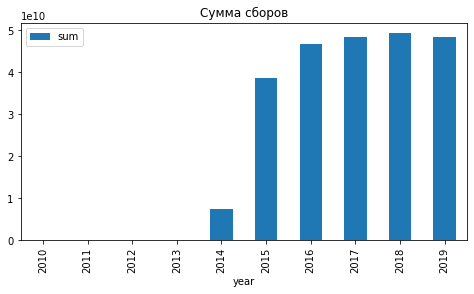

In [35]:
pivot_table_box_office_year = movies.query('box_office > 0').pivot_table(index = 'year', values = 'box_office', aggfunc = ['sum'])
pivot_table_box_office_year.columns = ['sum']
pivot_table_box_office_year
pivot_table_box_office_year.plot(y = 'sum', kind='bar', figsize = (8,4), xlim=(2010, 2019), title='Сумма сборов')
pivot_table_box_office_year.describe()
pivot_table_box_office_year.sort_values('sum')

- Сумма сборов была максимальной в 2018 году
- Сумма сборов была минимальной в 2010 году

In [36]:
with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(pivot_table_box_office_year.sort_values('sum'))

,sum
year,
2010,"2,177,414"
2012,"6,955,423"
2011,"14,041,290"
2013,"29,796,886"
2014,"7,434,701,303"
2015,"38,527,823,819"
2016,"46,742,067,582"
2019,"48,277,463,088"
2017,"48,458,147,254"


**- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.**

In [37]:
pivot_table_box_office_year = pivot_table_box_office_year.pivot_table(index = 'year', values = 'sum', aggfunc = ['mean', 'median'])
pivot_table_box_office_year.columns = ['Средняя сумма', 'Медианная сумма']

with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(pivot_table_box_office_year)

,Средняя сумма,Медианная сумма
year,,
2010,"2,177,414","2,177,414"
2011,"14,041,290","14,041,290"
2012,"6,955,423","6,955,423"
2013,"29,796,886","29,796,886"
2014,"7,434,701,303","7,434,701,303"
2015,"38,527,823,819","38,527,823,819"
2016,"46,742,067,582","46,742,067,582"
2017,"48,458,147,254","48,458,147,254"
2018,"49,251,991,405","49,251,991,405"


In [38]:
pivot_table_box_office_year = movies.query('box_office > 0').pivot_table(index = 'year', values = 'box_office', aggfunc = ['mean', 'median'])
pivot_table_box_office_year.columns = ['Средняя сумма', 'Медианная сумма']

with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(pivot_table_box_office_year)

,Средняя сумма,Медианная сумма
year,,
2010,"22,920","1,820"
2011,"132,465","2,952"
2012,"56,548","6,220"
2013,"167,398","3,680"
2014,"27,741,423","22,575"
2015,"85,050,384","4,972,558"
2016,"91,831,174","4,206,712"
2017,"136,501,823","9,919,415"
2018,"104,568,984","8,751,896"


- Медиана сильно меньше среднего, это говорит о том, что у большинства фильмов сборы маленькие, а у некоторых (у нембольшого количества) сборы большие.

**- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.**

<AxesSubplot:xlabel='year'>

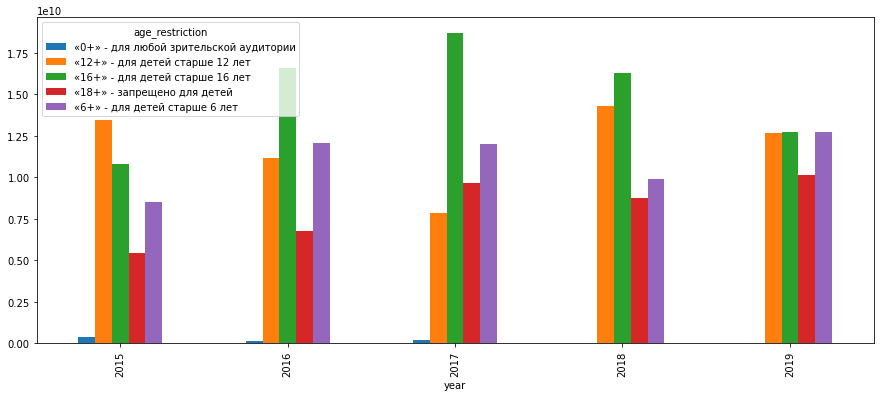

In [40]:
movies.query('year >= 2015').pivot_table(index = 'year',
                                         values = 'box_office',
                                         columns= 'age_restriction',
                                         aggfunc = 'sum').plot(kind='bar', figsize=(15,6))


- Фильмы с возрастным ограничением «16+» собрали больше всего денег в прокате
- Фильмы с возрастным ограничением «0+» собрали меньше всего денег в прокате
- В 2016-2018 фильмы с возрастным ограничением «16+» собрали больше всего денег в прокате, а в 2015 больше всего денег в прокате собрали фильмы с возрастным ограничением «12+», а в 2019 все (кроме «0+») примерно равны.
- Если смотреть на каждцю категорию отдельно, то из года в год все категории ведут себя по-разному
- Фильмы с возрастным ограничением «18+» собрают меньше денег в прокате, чем фильмы с другими ограничениями, так как люди часто ходят в кино с детьми или предпочитают не такие жестокие фильмы. Рейтинг «18+» носит запретительный характер, а ограничения от «0+» до «16+» – рекомендательный.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [41]:
print('Всего фильмов, которые получили государственную поддержку', len(movies.query('budget > 0')))

Всего фильмов, которые получили государственную поддержку 315


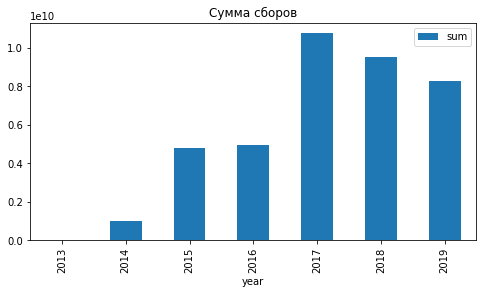

In [42]:
#сводная таблица суммы сборов фильмов, которые получили государственную поддержку 
pivot_table_gos_box_office_sum = movies.query('budget > 0').pivot_table(index = 'year', values = 'box_office', aggfunc = ['sum'])
pivot_table_gos_box_office_sum.columns = ['sum']
pivot_table_gos_box_office_sum.sort_values('sum')

#посмотрим на графике
pivot_table_gos_box_office_sum.plot(y = 'sum', kind='bar', figsize = (8,4), title='Сумма сборов');

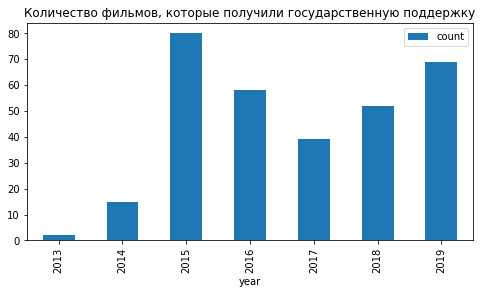

In [43]:
#сводная таблица количества фильмов, которые получили государственную поддержку
pivot_table_gos_count = movies.query('budget > 0').pivot_table(index = 'year', values = 'budget', aggfunc = ['count'])
pivot_table_gos_count.columns = ['count']
pivot_table_gos_count.sort_values('count')

#посмотрим на графике
pivot_table_gos_count.plot(y = 'count', kind='bar', figsize = (8,4), title='Количество фильмов, которые получили государственную поддержку');

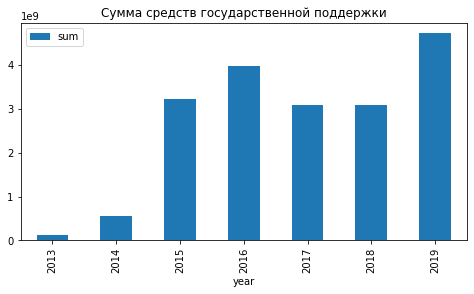

In [44]:
#сводная таблица суммы возвратных средств государственной поддержки и суммы невозвратных средств государственной поддержки
pivot_table_gos_sum = movies.query('budget > 0').pivot_table(index = 'year', values = ['refundable_support', 'nonrefundable_support'], aggfunc = ['sum'])
pivot_table_gos_sum.columns = ['sum_nonrefundable', 'sum_refundable']

#создадим столбец с суммой средств государственной поддержки
pivot_table_gos_sum['sum'] = pivot_table_gos_sum['sum_nonrefundable'] + pivot_table_gos_sum['sum_refundable']
pivot_table_gos_sum.sort_values('sum')

#посмотрим на графике
pivot_table_gos_sum.plot(y = 'sum', kind='bar', figsize = (8,4), title='Сумма средств государственной поддержки');

<AxesSubplot:xlabel='year'>

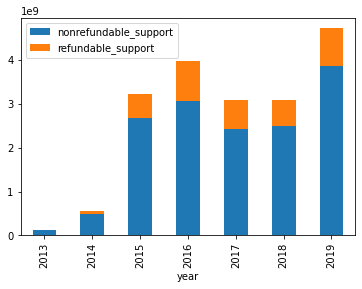

In [45]:
movies.query('budget > 0').pivot_table(index = 'year', values = ['refundable_support', 'nonrefundable_support'], aggfunc = 'sum').plot(kind='bar', stacked=True)

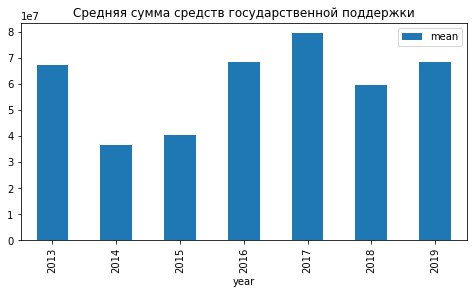

In [46]:
#объединим таблицу с суммой средств государственной поддержки с таблицей количества фильмов, которые получили государственную поддержку
pivot_table_gos = pivot_table_gos_sum.merge(pivot_table_gos_count, on='year', how='left')

#посчитаем в среднем сколько получил один фильм средств государственной поддержки
pivot_table_gos['mean'] = pivot_table_gos['sum'] / pivot_table_gos['count']
pivot_table_gos.sort_values('mean')

#посмотрим на графике
pivot_table_gos.plot(y = 'mean', kind='bar', figsize = (8,4), title='Средняя сумма средств государственной поддержки');

<AxesSubplot:xlabel='year'>

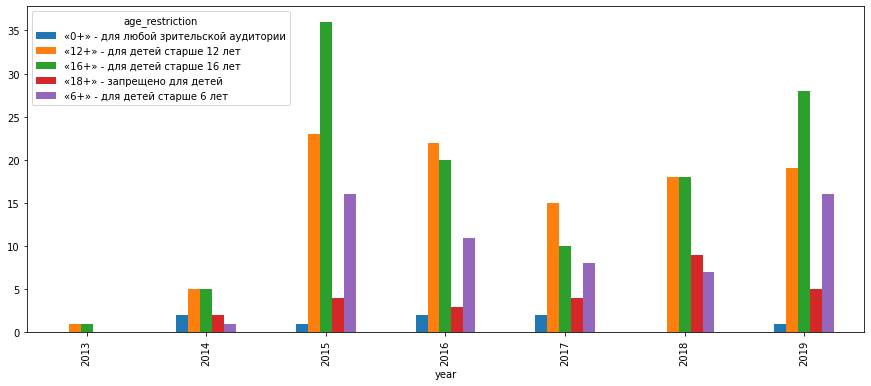

In [48]:
# График количества фильмов, которые получили государственную поддержку по возрастной категории

movies.query('budget > 0').pivot_table(index = 'year',
                                         values = 'budget',
                                         columns= 'age_restriction',
                                         aggfunc = 'count').plot(kind='bar', figsize=(15,6))

- фильмы, которые получили государственную поддержку, больше всего денег в прокате собрали в 2017 году, их было всего 39 шт., и один фильм в среднем получил в этом году больше всего средств государственной поддержки
- меньше всего в 2013 и фильмов с государственной поддержкой было всего 2, но средняя сумма средств государственной поддержки на один фильм в этом году соизмерима с 2016 и 2019 годом и эти фильмы имели возрастную категорию «12+» и «16+»
- с 2013 по 2017 было увеличение суммы сборов, а с 2017 идет спад 
- с 2015 по 2017 был спад в количестве фильмов с государственной поддержкой, а после 2017 пошел рост
- но в 2015 годы больше всего фильмов получили государственную поддержку (80 шт.), но средняя сумма средств государственной поддержки на один фильм в этом году примерна схожа с 2014 и в эти 2 года ниже, чем в остальные 
- в 2019 больше всего средств было выделленно из государства
- в 2018 году не было ни одного фильма с возрастной категорией «0+», который бы получил государственную поддержку
- больше всего фильмы имеют государственную поддержку с возрастной категорией «16+»

- **Проверим, хорошо ли окупаются фильмы с государственной поддержкой**

In [49]:
movies['box_office/budget'] = movies.apply(lambda x: 0 if x['budget'] == 0 else round(x['box_office'] / x['budget'], 4), axis=1)

print('Количество фильмов с господдержкой, которые не окупили себя:', 
      len(movies[(movies['box_office/budget'] != 0) & (movies['box_office/budget'] < 1)]))
print('Самый окупившийся фильм:', 
      movies[(movies['budget'] > 0) & (movies['box_office'] > 0)].sort_values('box_office/budget').iloc[-1]['title'])
print('Самый неокупившийся фильм:', 
      movies[(movies['budget'] > 0) & (movies['box_office'] > 0)].sort_values('box_office/budget').iloc[0]['title'])

#уберем значение 'box_office' = 0 и 'budget' = 0
movies[(movies['budget'] > 0) & (movies['box_office'] > 0)].pivot_table(index = 'year', values = 'box_office/budget', aggfunc = 'mean').sort_values('box_office/budget')

Количество фильмов с господдержкой, которые не окупили себя: 234
Самый окупившийся фильм: Холоп
Самый неокупившийся фильм: Я-Учитель


,box_office/budget
year,
2013,0.059000
2015,0.478351
2016,0.598582
2014,0.625420
2019,0.878042
2017,1.022338
2018,1.129173


В среднем только в 2017 и 2018 годах фильмы с господдержкой окупили себя

 - **Сравним рейтинги фильмов с государственной поддержкой и без поддержки**

In [58]:
(movies['ratings'] == 0).sum()

956

In [50]:
display('Средние рейтинги фильмов с государственной поддержкой', 
        movies.query('budget > 0').pivot_table(index = 'year', values = 'ratings', aggfunc = 'mean'))
display('Средние рейтинги фильмов без государственной поддержки', 
        movies.query('budget == 0').pivot_table(index = 'year', values = 'ratings', aggfunc = 'mean'))
display('Отношение среднего рейтинга фильмов без государственной поддержки к фильмам без поддержки', 
        movies.query('budget > 0').pivot_table(index = 'year', values = 'ratings', aggfunc = 'mean') /  movies.query('budget == 0').pivot_table(index = 'year', values = 'ratings', aggfunc = 'mean'))

'Средние рейтинги фильмов с государственной поддержкой'

,ratings
year,
2013,6.700000
2014,5.566667
2015,5.912500
2016,5.300000
2017,5.743590
2018,5.809615
2019,5.907246


'Средние рейтинги фильмов без государственной поддержки'

,ratings
year,
2010,6.027078
2011,5.927542
2012,5.928407
2013,5.986007
2014,5.979642
2015,5.478125
2016,5.362013
2017,5.425439
2018,4.659976


'Отношение среднего рейтинга фильмов без государственной поддержки к фильмам без поддержки'

,ratings
year,
2010,NaN
2011,NaN
2012,NaN
2013,1.119277
2014,0.930936
2015,1.079293
2016,0.988435
2017,1.058641
2018,1.246705


In [61]:
movies[movies['ratings'] > 0].groupby([movies['budget'] == 0,'year']).agg({'ratings' : 'mean'}).unstack('budget').round(2)

ratings      
budget   False True 
year                
2010       NaN  6.66
2011       NaN  6.48
2012       NaN  6.50
2013      6.70  6.51
2014      5.96  6.56
2015      6.14  6.35
2016      5.69  6.38
2017      6.05  6.34
2018      6.04  6.43
2019      6.18  6.54

- Видим, что государственная поддержка фильмов началась с 2013 года (или данных за более ранние года нет)
- Чаще рейтинги фильмов с государственной поддержкой били выше фильмов без поддержки, но все же не сильно

### Шаг 5. Напишите общий вывод

- Больше всего фильмов выходило в 2019 году (902 шт.), а меньше всего в 2017 году (495 шт.)
- В кинотеатрах больше всего фильмов выходило так же в 2019 году (527 шт.), а меньше всего в 2010 году (95 шт.)
- В 2019 году больше фильмов выходило в прокат в кинотеатрах, чем не выходило в кинотеатрах, а меньше всего в 2010 году
- Сумма сборов была максимальной в 2018 году, а в 2010 году сумма сборов была минимальной
- Фильмы с возрастным ограничением «16+» собрали больше всего денег в прокате и они больше всего имеют государственную поддержку, а меньше всего денег в прокате собрали фильмы с возрастным ограничением «0+» и в 2018 году не было ни одного фильма с возрастной категорией «0+», который бы получил государственную поддержку
- Фильмы с возрастным ограничением «18+» собрают меньше денег в прокате, чем фильмы с другими ограничениями, так как люди часто ходят в кино с детьми или предпочитают не такие жестокие фильмы. Рейтинг «18+» носит запретительный характер, а ограничения от «0+» до «16+» – рекомендательный. И их меньше поддерживает государство.
- Государственная поддержка фильмов началась с 2013 года (или данных за более ранние года нет). В 2013- 2015 годах, меньшая суммы сборов фильмов, которые получили государственную поддержку. В 2013-2014 маль фильмов получили государственную поддержку, а в 2015 средняя сумма средств государственной поддержки на один фильм очень низкая 
- Становится все лучше в 2017 году. Фильмы, которые получили государственную поддержку, больше всего денег в прокате собрали в 2017 году и один фильм в среднем получил в этом году больше всего средств государственной поддержки
- Количество фильмов с господдержкой, которые не окупили себя: 234 шт. Самый окупившийся фильм с государственной поддержкой: Холоп, а самый неокупившийся фильм: Я-Учитель
- Чаще рейтинги фильмов с государственной поддержкой били выше фильмов без поддержки